In [353]:
import pandas as pd

# Read each tab into separate DataFrames
df1 = pd.read_excel('output_data/Project_1_Data.xlsx', sheet_name='Demo', dtype={'Other ID': str})
df2 = pd.read_excel('output_data/Project_1_Data.xlsx', sheet_name='Eco Disadvantage and Income', dtype={'Other ID': str})
#df3 = pd.read_excel('output_data/Project_1_Data.xlsx', sheet_name='Credits and Term', dtype={'Other ID': str})
df4 = pd.read_excel('output_data/Project_1_Data.xlsx', sheet_name='Graduates', dtype={'Other ID': str})
df5 = pd.read_excel('output_data/Project_1_Data.xlsx', sheet_name='Withdrawal Dates', dtype={'Other ID': str})

# Ensure 'Other ID' column is treated as string to preserve leading zeros 
#df3
for df in [df1, df2, df4, df5]:
    df['Other ID'] = df['Other ID'].astype(str)

# Merge the DataFrames based on the 'Other ID' column
combined_df = df1.merge(df2, on='Other ID', how='outer')
#combined_df = combined_df.merge(df3, on='Other ID', how='outer')
combined_df = combined_df.merge(df4, on='Other ID', how='outer')
combined_df = combined_df.merge(df5, on='Other ID', how='outer')

# Export the combined DataFrame to a new Excel file
#combined_df.to_excel('combined_data.xlsx', index=False)
# Display or export the combined DataFrame
print(combined_df.head(5))

   Ent_x Cal Code_x Other ID    Status  Age Sex          Local Race  \
0      1        001   000837  Inactive   32   F  WHITE/NON HISPANIC   
1      1        001   000837  Inactive   32   F  WHITE/NON HISPANIC   
2      1        001  2276777  Inactive   36   M  BLACK/NON HISPANIC   
3      1        001   000344  Inactive   36   M  BLACK/NON HISPANIC   
4      1        001  4576892  Inactive   29   F  WHITE/NON HISPANIC   

  His/Lat Ethnicity Grad Date_x        DOB  ... Household Size  \
0                 N         NaT 1992-01-17  ...            0.0   
1                 N         NaT 1992-01-17  ...            0.0   
2                 N         NaT 1987-11-30  ...            NaN   
3                 Y         NaT 1988-01-01  ...            0.0   
4                 N         NaT 1994-09-07  ...            2.0   

  Qualifies as Eco Dis Total Income Ent Cal Code_y  Grad Date_y  \
0                  NaN       3200.0 NaN        NaN          NaT   
1                  NaN       3200.0 NaN   

In [354]:
#Replace headings
combined_df.rename(columns={'Ent_x': 'School',
                            'Cal Code_x': 'Student Type',
                            'Schl Yr': 'School Year',
                            'Other ID': 'ID',
                            'DOB': 'Date of Birth',
                           'Student Language Description': 'Student Language',
                            'Withdrawal Date_x': 'Graduate Withdrawal Date',
                            'Withdrw': 'Graduated',
                            'Withdrawal Comment' : 'Drop Out Withdraw Reason',
                            'Ent': 'Graduate Campus',
                            'Cal Code_y': 'Graduate Student Type',
                            'Grad Date_y': 'Graduate Date',
                            'Withdrawal Date_y': 'Drop Out Date',
                            'Drop Out Withdraw Date': 'Graduate Status',
                            'Entity': 'Credit Earned Campus'
                           }, inplace=True)
#delete columns not needed
#combined_df.drop(columns=['Age', 'Ent_y', 'Cat'], inplace=True)
# Display the updated DataFrame
print(combined_df.columns)

Index(['School', 'Student Type', 'ID', 'Status', 'Age', 'Sex', 'Local Race',
       'His/Lat Ethnicity', 'Grad Date_x', 'Date of Birth', 'Birth Country',
       'Student Language', 'Home Language Description', 'Marital Status',
       'Fed Race Description', 'Ent_y', 'Economic Disadvantage', 'Econ Dis',
       'Food Stamps/TANF', 'Household Size', 'Qualifies as Eco Dis',
       'Total Income', 'Graduate Campus', 'Graduate Student Type',
       'Graduate Date', 'Graduate Withdrawal Date', 'Graduated',
       'Drop Out Date', 'Drop Out Withdraw Reason'],
      dtype='object')


In [355]:
# Define a dictionary to map values in school to their corresponding labels
mapping = {
        1: 'Norwood',
        2: 'Coleman',
        3: 'South Austin',
        4: 'Billy Moore',
        5: 'Bradshaw',
        6: 'AYW',
        7: 'Diboll',
        8: 'Connally',
        800: 'Alumni',
       }
# Replace values in column A using the mapping dictionary
combined_df['School'] = combined_df['School'].replace(mapping)
# Replace values in column A using the mapping dictionary
combined_df['Graduate Campus'] = combined_df['Graduate Campus'].replace(mapping)
# Replace values in column A using the mapping dictionary
#combined_df['Credit Earned Campus'] = combined_df['Credit Earned Campus'].replace(mapping)
# Display the updated DataFrame
print(combined_df.head(5))

    School Student Type       ID    Status  Age Sex          Local Race  \
0  Norwood          001   000837  Inactive   32   F  WHITE/NON HISPANIC   
1  Norwood          001   000837  Inactive   32   F  WHITE/NON HISPANIC   
2  Norwood          001  2276777  Inactive   36   M  BLACK/NON HISPANIC   
3  Norwood          001   000344  Inactive   36   M  BLACK/NON HISPANIC   
4  Norwood          001  4576892  Inactive   29   F  WHITE/NON HISPANIC   

  His/Lat Ethnicity Grad Date_x Date of Birth  ... Household Size  \
0                 N         NaT    1992-01-17  ...            0.0   
1                 N         NaT    1992-01-17  ...            0.0   
2                 N         NaT    1987-11-30  ...            NaN   
3                 Y         NaT    1988-01-01  ...            0.0   
4                 N         NaT    1994-09-07  ...            2.0   

  Qualifies as Eco Dis Total Income Graduate Campus Graduate Student Type  \
0                  NaN       3200.0             NaN      

In [356]:
# Define a dictionary to map values in school to their corresponding labels
mapping = {
        1: 'Day Student',
        2: 'Day Student',
        3: 'Night Student',
        4: 'Day Student',
        5: 'Day Student',
        6: 'Day Student',
        7: 'Day Student',
        8: 'Day Student',
        '001': 'Day Student',
        '002': 'Day Student',
        '003': 'Night Student',
        '004': 'Day Student',
        '005': 'Day Student',
        '006': 'Day Student',
        '007': 'Day Student',
        '008': 'Day Student',
        '107': 'Day Student',
        '126': 'Day Student',
        800: 'Graduate',
        '800': 'Graduate',
        'I01': 'Online Student',
        'I26': 'Online Student',
        'N01': 'Night Student',
        'N03': 'Night Student',
        'N26': 'Night Student',
        'O26': 'Day Student'
       }
# Replace values in student type column using the mapping dictionary
combined_df['Student Type'] = combined_df['Student Type'].replace(mapping)
# Replace values in graduate student type using the mapping dictionary
combined_df['Graduate Student Type'] = combined_df['Graduate Student Type'].replace(mapping)
# Display the updated DataFrame
print(combined_df.head(5))

    School Student Type       ID    Status  Age Sex          Local Race  \
0  Norwood  Day Student   000837  Inactive   32   F  WHITE/NON HISPANIC   
1  Norwood  Day Student   000837  Inactive   32   F  WHITE/NON HISPANIC   
2  Norwood  Day Student  2276777  Inactive   36   M  BLACK/NON HISPANIC   
3  Norwood  Day Student   000344  Inactive   36   M  BLACK/NON HISPANIC   
4  Norwood  Day Student  4576892  Inactive   29   F  WHITE/NON HISPANIC   

  His/Lat Ethnicity Grad Date_x Date of Birth  ... Household Size  \
0                 N         NaT    1992-01-17  ...            0.0   
1                 N         NaT    1992-01-17  ...            0.0   
2                 N         NaT    1987-11-30  ...            NaN   
3                 Y         NaT    1988-01-01  ...            0.0   
4                 N         NaT    1994-09-07  ...            2.0   

  Qualifies as Eco Dis Total Income Graduate Campus Graduate Student Type  \
0                  NaN       3200.0             NaN      

In [357]:
# recode values in graduated column, 1 to graduate
mapping = {
        "1": 'Graduate',
        '': 'Dropped Date',
       }
# Convert the 'Graduate Status' column to string type
combined_df['Graduated'] = combined_df['Graduated'].astype(str)

# Replace values in column A using the mapping dictionary
combined_df['Graduated'] = combined_df['Graduated'].replace(mapping)

# Display the updated DataFrame
print(combined_df.head(5))

    School Student Type       ID    Status  Age Sex          Local Race  \
0  Norwood  Day Student   000837  Inactive   32   F  WHITE/NON HISPANIC   
1  Norwood  Day Student   000837  Inactive   32   F  WHITE/NON HISPANIC   
2  Norwood  Day Student  2276777  Inactive   36   M  BLACK/NON HISPANIC   
3  Norwood  Day Student   000344  Inactive   36   M  BLACK/NON HISPANIC   
4  Norwood  Day Student  4576892  Inactive   29   F  WHITE/NON HISPANIC   

  His/Lat Ethnicity Grad Date_x Date of Birth  ... Household Size  \
0                 N         NaT    1992-01-17  ...            0.0   
1                 N         NaT    1992-01-17  ...            0.0   
2                 N         NaT    1987-11-30  ...            NaN   
3                 Y         NaT    1988-01-01  ...            0.0   
4                 N         NaT    1994-09-07  ...            2.0   

  Qualifies as Eco Dis Total Income Graduate Campus Graduate Student Type  \
0                  NaN       3200.0             NaN      

In [358]:
Trend_df = combined_df.copy()

In [359]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [360]:
# Filter data for graduates
graduates = Trend_df[Trend_df['Graduated'] == 'Graduated']

# Filter data for dropouts
dropouts = Trend_df[Trend_df['Drop Out Withdraw Reason'] == 'Dropped Out']

# Filter data for unique graduates
unique_graduates = graduates.drop_duplicates(subset='ID')

# Filter data for unique dropouts
unique_dropouts = dropouts.drop_duplicates(subset='ID')

#define the start and end dates of academic year
academic_year_start=pd.date_range(start="2014-08-01",periods =10, freq="AS-AUG") 
academic_year_end=academic_year_start + pd.DateOffset(years=1) - pd.Timedelta(days=1)  # End of each academic year

# loop over each academic year and filter the data
for start_date, end_date in zip(academic_year_start, academic_year_end):
    print(f"Academic Year Start: {start_date}, End: {end_date}")

Academic Year Start: 2014-08-01 00:00:00, End: 2015-07-31 00:00:00
Academic Year Start: 2015-08-01 00:00:00, End: 2016-07-31 00:00:00
Academic Year Start: 2016-08-01 00:00:00, End: 2017-07-31 00:00:00
Academic Year Start: 2017-08-01 00:00:00, End: 2018-07-31 00:00:00
Academic Year Start: 2018-08-01 00:00:00, End: 2019-07-31 00:00:00
Academic Year Start: 2019-08-01 00:00:00, End: 2020-07-31 00:00:00
Academic Year Start: 2020-08-01 00:00:00, End: 2021-07-31 00:00:00
Academic Year Start: 2021-08-01 00:00:00, End: 2022-07-31 00:00:00
Academic Year Start: 2022-08-01 00:00:00, End: 2023-07-31 00:00:00
Academic Year Start: 2023-08-01 00:00:00, End: 2024-07-31 00:00:00


In [361]:
# create a dictionary to store the counts of graduates for each academic year
grad_count = {}
drop_out_count = {}

# Loop over each academic year
for start_date, end_date in zip(academic_year_start, academic_year_end):
    # Filter the data for graduation dates within the academic year
    academic_year_grads = Trend_df[(Trend_df["Graduate Withdrawal Date"] >= start_date) & (Trend_df["Graduate Withdrawal Date"] <= end_date)]
    academic_year_drop_outs = Trend_df[(Trend_df["Drop Out Date"] >= start_date) & (Trend_df["Drop Out Date"] <= end_date)]
   
    # Count the number of graduates for the current academic year
    num_graduates = len(academic_year_grads)
    num_drop_outs = len(academic_year_drop_outs)
   
    # Store the count in the dictionary with the academic year as the key
    academic_year = start_date.year
    grad_count[academic_year] = num_graduates
   
    #dropout
    academic_year = start_date.year
    drop_out_count[academic_year] = num_drop_outs

# Print the counts of graduates for each academic year
for year, count in grad_count.items():
    print(f"Count of graduates in academic year {year}: {count}")

# Print the counts of drop outs for each academic year
for year, count in drop_out_count.items():
    print(f"Count of drop outs in academic year {year}: {count}")

Count of graduates in academic year 2014: 50
Count of graduates in academic year 2015: 146
Count of graduates in academic year 2016: 126
Count of graduates in academic year 2017: 190
Count of graduates in academic year 2018: 168
Count of graduates in academic year 2019: 249
Count of graduates in academic year 2020: 226
Count of graduates in academic year 2021: 291
Count of graduates in academic year 2022: 360
Count of graduates in academic year 2023: 40
Count of drop outs in academic year 2014: 0
Count of drop outs in academic year 2015: 0
Count of drop outs in academic year 2016: 710
Count of drop outs in academic year 2017: 970
Count of drop outs in academic year 2018: 1489
Count of drop outs in academic year 2019: 1105
Count of drop outs in academic year 2020: 735
Count of drop outs in academic year 2021: 1789
Count of drop outs in academic year 2022: 1509
Count of drop outs in academic year 2023: 1653


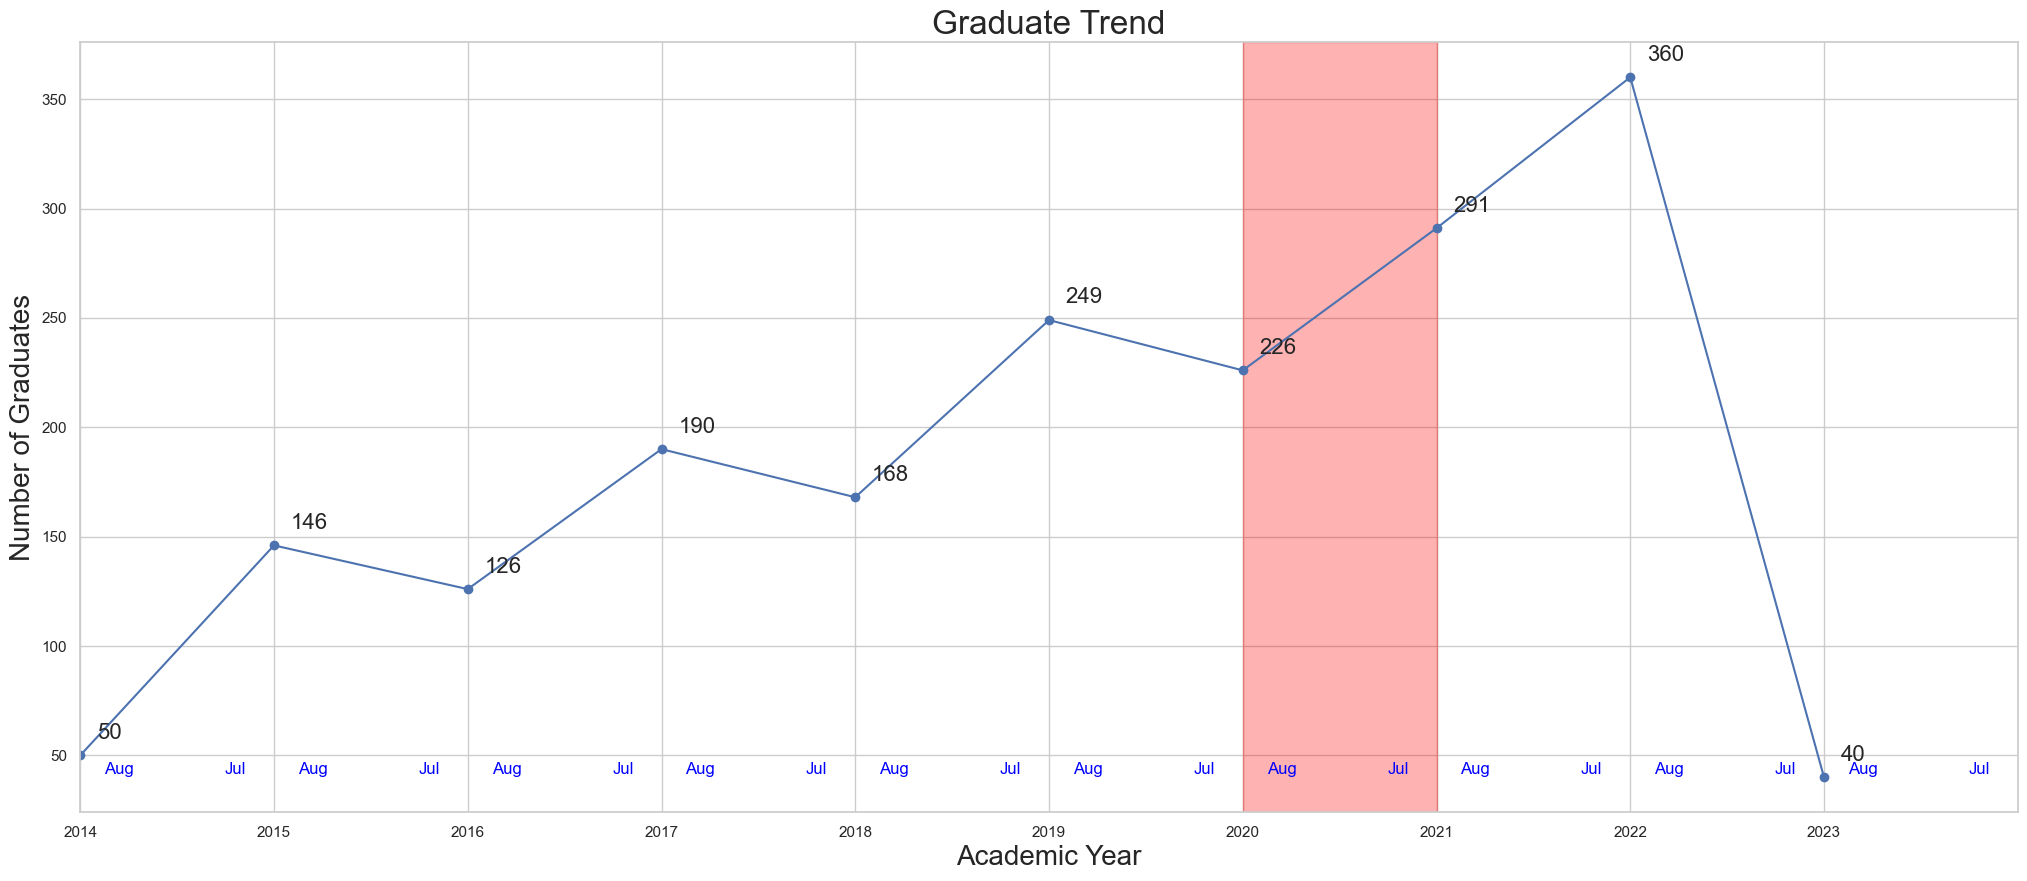

In [384]:
# Extract the academic years and counts of graduates
academic_years = list(grad_count.keys())
graduate_counts = list(grad_count.values())

# Create an array of all academic years from the minimum to the maximum year in the data
all_years = np.arange(min(academic_years), max(academic_years) + 1)

# Create a line plot
plt.figure(figsize=(25, 10))
plt.plot(academic_years, graduate_counts, marker='o', linestyle='-')

# Set x-axis ticks to show every year
plt.xticks(np.arange(min(all_years), max(all_years) + 1, 1))

# Annotate each point with its corresponding count
for year, count in zip(academic_years, graduate_counts):
    plt.annotate(f'{count}', xy=(year, count), xytext=(12, 12), textcoords='offset points', fontsize=16)

# Add shaded region for COVID-19 period (March 2020 to March 2021)
plt.axvspan(2020, 2021, color='red', alpha=0.3, label='COVID-19 Period')

# Annotate start and end months of each academic year
for start_date, end_date in zip(academic_year_start, academic_year_end):
    plt.text(start_date.year + 0.2,  # position for better visibility
             graduate_counts[-1],     # Plot annotation at the top of the last point
             start_date.strftime('%b'),  # Get the start month abbreviation (e.g., Aug)
             ha='center', va='bottom',  # Align annotation horizontally and vertically
             fontsize=12, color='blue')  # Set fontsize and color
    plt.text(end_date.year - 0.2,  # Adjust position for better visibility
             graduate_counts[-1],  # Plot annotation at the top of the last point
             end_date.strftime('%b'),  # Get the end month abbreviation (e.g., Jul)
             ha='center', va='bottom',  # Align annotation horizontally and vertically
             fontsize=12, color='blue')  # Set fontsize and color

# Append 2024 to the list of years
all_years = np.append(all_years, 2024)

# Set x-axis limits to include 2024
plt.xlim(min(all_years), max(all_years))

# Add labels and title
plt.xlabel('Academic Year', fontsize=20)
plt.ylabel('Number of Graduates', fontsize=20)
plt.title('Graduate Trend', fontsize=24)

# Show grid
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('grad.png')

# Show plot
plt.show()

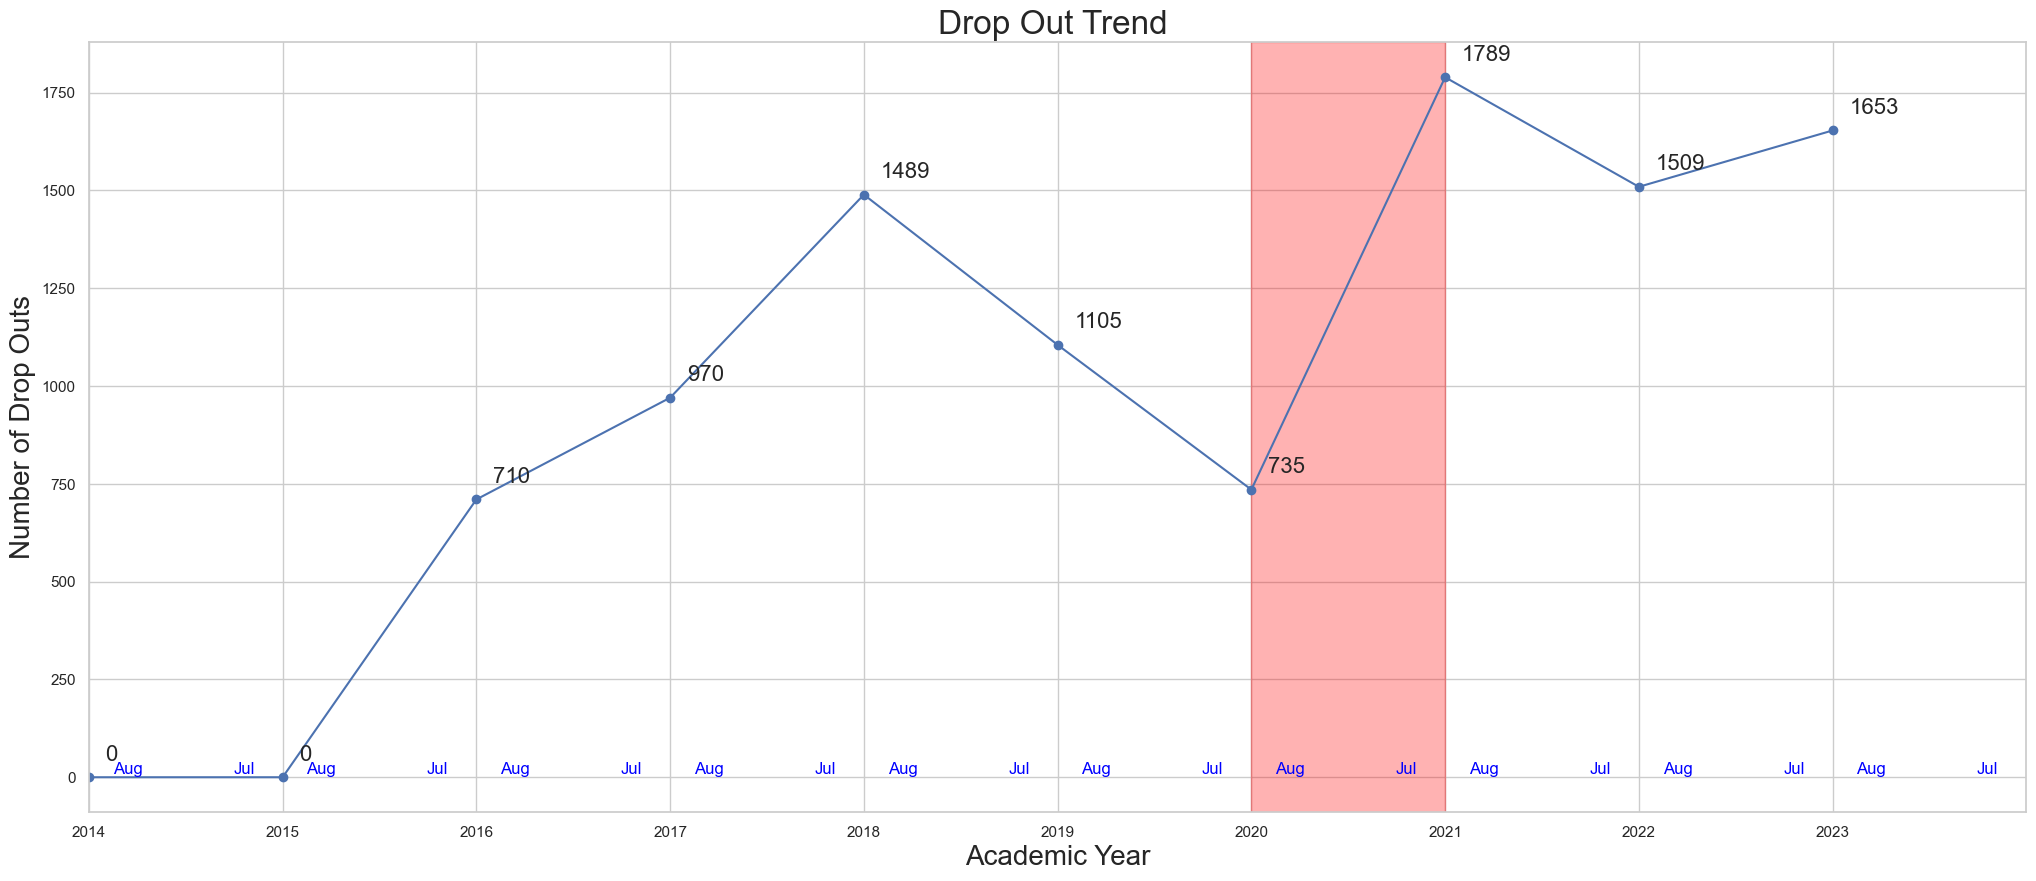

In [385]:
# Extract the academic years and counts of students that dropped out
academic_years = list(drop_out_count.keys())
drop_out_counts = list(drop_out_count.values())

# Create an array of all academic years from the minimum to the maximum year in the data
all_years = np.arange(min(academic_years), max(academic_years) + 1)

# Create a line plot
plt.figure(figsize=(25, 10))
plt.plot(academic_years, drop_out_counts, marker='o', linestyle='-')

# Set x-axis ticks to show every year
plt.xticks(np.arange(min(all_years), max(all_years) + 1, 1))

# Annotate each point with its corresponding count
for year, count in zip(academic_years, drop_out_counts):
    plt.annotate(f'{count}', xy=(year, count), xytext=(12,12), textcoords='offset points', fontsize=16)

# Add shaded region for COVID-19 period (March 2020 to March 2021)
plt.axvspan(2020, 2021, color='red', alpha=0.3, label='COVID-19 Period')

# Annotate start and end months of each academic year
for start_date, end_date in zip(academic_year_start, academic_year_end):
    plt.text(start_date.year + 0.2,  # position for better visibility
             min(drop_out_counts),     # Plot annotation at the top of the last point
             start_date.strftime('%b'),  # Get the start month abbreviation (e.g., Aug)
             ha='center', va='bottom',  # Align annotation horizontally and vertically
             fontsize=12, color='blue')  # Set fontsize and color
    plt.text(end_date.year - 0.2,  # Adjust position for better visibility
             min(drop_out_counts),  # Plot annotation at the top of the last point
             end_date.strftime('%b'),  # Get the end month abbreviation (e.g., Jul)
             ha='center', va='bottom',  # Align annotation horizontally and vertically
             fontsize=12, color='blue')  # Set fontsize and color

# Append 2024 to the list of years
all_years = np.append(all_years, 2024)

# Set x-axis limits to include 2024
plt.xlim(min(all_years), max(all_years))

# Add labels and title
plt.xlabel('Academic Year',fontsize=20)
plt.ylabel('Number of Drop Outs', fontsize=20)
plt.title('Drop Out Trend ', fontsize=24)

# Show grid
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('dropout_trend.png')

# Show plot
plt.show()

In [364]:
# Assuming academic years start in August and end in July
academic_year_start = pd.date_range(start="2014-08-01", end="2024-07-31", freq="AS-AUG")
academic_year_end = academic_year_start + pd.DateOffset(years=1) - pd.Timedelta(days=1)

# Create a new DataFrame with selected columns
new_df = Trend_df[['ID', 'Graduate Withdrawal Date', 'Drop Out Date', 'Student Language', 'Age']].copy()

# Define a function to assign academic years to dates
def assign_academic_year(date):
    for start_date, end_date in zip(academic_year_start, academic_year_end):
        if pd.isnull(date) or not pd.isnull(date) and start_date <= date <= end_date:
            return start_date.year
    return None

# Apply the function to both graduate withdrawal dates and dropout dates
new_df['Graduate Academic Year'] = new_df['Graduate Withdrawal Date'].apply(assign_academic_year)
new_df['Drop Out Academic Year'] = new_df['Drop Out Date'].apply(assign_academic_year)

# Convert the academic year columns to integers, replacing NaN with a default value (-1)
new_df['Graduate Academic Year'] = new_df['Graduate Academic Year'].fillna(-1).astype(int)
new_df['Drop Out Academic Year'] = new_df['Drop Out Academic Year'].fillna(-1).astype(int)

# Define the age groupings based on specific conditions
age_groups = []

for age in new_df['Age']:
    if age >= 18 and age <= 24:
        age_groups.append('18-24')
    elif age >= 25 and age <= 34:
        age_groups.append('25-34')
    elif age >= 35 and age <= 44:
        age_groups.append('35-44')
    elif age >= 45 and age <= 54:
        age_groups.append('45-54')
    elif age >= 55:
        age_groups.append('55+')
    else:
        age_groups.append('Other')

# Add the age groups to the DataFrame
new_df['Age Group'] = age_groups

# Display the new DataFrame
print(new_df)

            ID Graduate Withdrawal Date Drop Out Date Student Language  Age  \
0       000837                      NaT    2019-04-13           ARABIC   32   
1       000837                      NaT    2019-08-02           ARABIC   32   
2      2276777                      NaT    2023-02-25           ARABIC   36   
3       000344                      NaT    2016-08-02           SOMALI   36   
4      4576892                      NaT    2023-09-23           PASHTO   29   
...        ...                      ...           ...              ...  ...   
13976     1919                      NaT    2016-08-02          SPANISH   26   
13977     1458                      NaT           NaT          SPANISH   26   
13978     1575                      NaT    2016-08-02          ENGLISH   28   
13979      679                      NaT    2016-08-02          ENGLISH   31   
13980     2184                      NaT    2018-04-14           ARABIC   30   

       Graduate Academic Year  Drop Out Academic Ye